<a href="https://colab.research.google.com/github/stochasticats/credit-card-fraud-detection/blob/master/creditcardfrauddetection_keras_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import os
import shutil
import matplotlib.pyplot as plt

2.1.0


In [2]:
dataset = pd.read_csv("creditcard.csv", header = 0)

In [3]:
model_features = dataset.iloc[:,1:30].columns

In [4]:
print(model_features)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [5]:
dataset["Amount"] = (dataset["Amount"] - dataset["Amount"].min()) / (dataset["Amount"].max() - dataset["Amount"].min())

In [6]:
dataset["Amount"].describe()

count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: Amount, dtype: float64

In [7]:
dataset["Amount"].head()

0    0.005824
1    0.000105
2    0.014739
3    0.004807
4    0.002724
Name: Amount, dtype: float64

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [9]:
dataset[model_features].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [10]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(dataset[model_features], dataset["Class"].to_numpy())

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.15)
y_train = np.reshape(y_train, (len(y_train),1))
y_test = np.reshape(y_test, (len(y_test),1))

In [12]:
import imblearn
imblearn.show_versions(github=True)

<details><summary>System, Dependency Information</summary>

**System Information**

* python    : `3.7.6 (default, Jan  8 2020, 13:42:34)  [Clang 4.0.1 (tags/RELEASE_401/final)]`
* executable: `/Users/karimitani/opt/anaconda3/bin/python`
* machine   : `Darwin-19.0.0-x86_64-i386-64bit`

**Python Dependencies**

* pip       : `20.0.2`
* setuptools: `46.0.0.post20200309`
* imblearn  : `0.7.0`
* sklearn   : `0.23.1`
* numpy     : `1.18.3`
* scipy     : `1.4.1`
* Cython    : `0.29.15`
* pandas    : `1.0.1`
* keras     : `2.3.1`
* tensorflow: `2.1.0`
* joblib    : `0.14.1`

</details>


Using TensorFlow backend.


In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483335, 29)
(85295, 29)
(483335, 1)
(85295, 1)


In [14]:
def create_model():
  model = tf.keras.Sequential([
      # This is the first layer
      tf.keras.layers.Dense(14, input_shape=(29,), activation='relu'),
      tf.keras.layers.Dense(7, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])
  
  adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(
        loss = 'binary_crossentropy', 
        optimizer = adam, 
        metrics = ['accuracy'])
  return model

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x = x_train, y = y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Train on 483335 samples, validate on 85295 samples
Epoch 1/10
483335/483335 [==============================] - 16s 33us/sample - loss: 0.1673 - accuracy: 0.9368 - val_loss: 0.0995 - val_accuracy: 0.9623
Epoch 2/10
483335/483335 [==============================] - 15s 32us/sample - loss: 0.0829 - accuracy: 0.9679 - val_loss: 0.0727 - val_accuracy: 0.9703
Epoch 3/10
483335/483335 [==============================] - 15s 31us/sample - loss: 0.0624 - accuracy: 0.9762 - val_loss: 0.0562 - val_accuracy: 0.9827
Epoch 4/10
483335/483335 [==============================] - 15s 31us/sample - loss: 0.0491 - accuracy: 0.9857 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 5/10
483335/483335 [==============================] - 15s 31us/sample - loss: 0.0400 - accuracy: 0.9896 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 6/10
483335/483335 [==============================] - 15s 31us/sample - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 7/10
483335/483335 [===========

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
probabilities = model.predict(x = x_test)
print(probabilities)

[[0.9476112 ]
 [1.        ]
 [0.9998486 ]
 ...
 [1.        ]
 [0.9949767 ]
 [0.00100668]]


Confusion matrix, without normalization
[[42350   310]
 [    0 42635]]


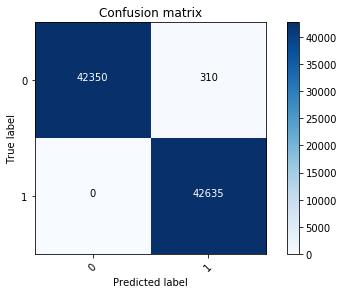

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, (probabilities>0.5).astype(int))
plot_confusion_matrix(cnf_matrix, classes = range(2))
plt.show()